In [19]:
# Dependencies matplotlib's pyplot, pandas, scripy's stats with lineregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [4]:
# For more info about the data visit:
    # https://fred.stlouisfed.org/series/IPN31152N
    # https://en.wikipedia.org/wiki/Industrial_production_index

# Set a path to data file in resources.
file = "./Resources/frozen_desert_IPN31152N.csv"
    
# Loading the data into a variable named "fd_data".
fd_data = pd.read_csv(file)

# Display the first 5 rows of fd_data
fd_data.head()

,DATE,output
0,1/1/1972,58.8126
1,2/1/1972,65.8899
2,3/1/1972,73.0930
3,4/1/1972,77.1119
4,5/1/1972,83.9479


In [12]:
# Add a year column by converting date from fd_data.
fd_data["year"] = fd_data["DATE"].str.slice(-4)

# Display the first 5 rows of fd_data
fd_data.head()

,DATE,output,year
0,1/1/1972,58.8126,1972
1,2/1/1972,65.8899,1972
2,3/1/1972,73.0930,1972
3,4/1/1972,77.1119,1972
4,5/1/1972,83.9479,1972


In [13]:
# Create a variable named "fd_year_df"
    # Group output by year and sum your data.
fd_year_df = fd_data.groupby("year").sum()

# Display the first 5 rows of fd_year_df
fd_year_df.head()

,output
year,
1972,936.9214
1973,995.8159
1974,1002.9930
1975,1032.5290
1976,1025.9753


In [18]:
# Create a list of years as "year" from fd_year_df
year = list(fd_year_df.index.values) 

# Display the first 5 rows of year
year[0:5]

['1972', '1973', '1974', '1975', '1976']

In [20]:
# Create a variable named "x_axis"
    # Set it to the list of index for matching the regression line using.
        # Hint use np.arange
x_axis = np.arange(len(year))

# Display the x_axis variable
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [25]:
# Create a variable named "output"
    # Set it to the list of output from fd_year_df.
output = fd_year_df["output"]

# Display the first 5 rows of output
output[0:5]

year
1972     936.9214
1973     995.8159
1974    1002.9930
1975    1032.5290
1976    1025.9753
Name: output, dtype: float64

In [27]:
# Retrieve the slope and intercept from x_axis and output.
(slope, intercept, _, _, _) = linregress(x_axis, output)

# Set the fit variabel equal to the slope times the x_axis and add the intercept
fit = slope * x_axis + intercept

# Display the fit variable
fit

array([1117.00771543, 1125.25916434, 1133.51061325, 1141.76206216,
       1150.01351108, 1158.26495999, 1166.5164089 , 1174.76785782,
       1183.01930673, 1191.27075564, 1199.52220456, 1207.77365347,
       1216.02510238, 1224.2765513 , 1232.52800021, 1240.77944912,
       1249.03089803, 1257.28234695, 1265.53379586, 1273.78524477,
       1282.03669369, 1290.2881426 , 1298.53959151, 1306.79104043,
       1315.04248934, 1323.29393825, 1331.54538716, 1339.79683608,
       1348.04828499, 1356.2997339 , 1364.55118282, 1372.80263173,
       1381.05408064, 1389.30552956, 1397.55697847, 1405.80842738,
       1414.0598763 , 1422.31132521, 1430.56277412, 1438.81422303,
       1447.06567195, 1455.31712086, 1463.56856977, 1471.82001869,
       1480.0714676 , 1488.32291651, 1496.57436543])

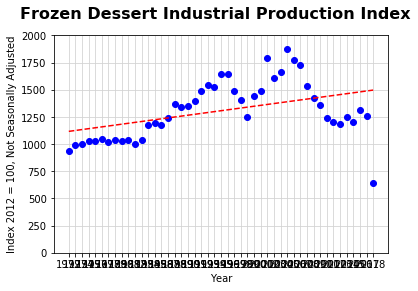

In [41]:
# Graphing the output:

# Create the subplot
fig, ax = plt.subplots()

# Add a title
fig.suptitle("Frozen Dessert Industrial Production Index", fontsize = 16, fontweight = "bold")

# Set the x limit and y limit
#ax.set_xlim(min(year), max(year))
ax.set_ylim(0, 2000)

# Add labels for x and y axis
ax.set_xlabel("Year")
ax.set_ylabel("Index 2012 = 100, Not Seasonally Adjusted")


# Plot the output and fit line based on year.
ax.plot(year, output, color = "b", linewidth = 0, marker = 'o')
ax.plot(year, fit, 'r--')

# Add grid lines
ax.grid(b=True, which='major', color='lightgray', linestyle='-')

# Show plot
plt.show()